In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

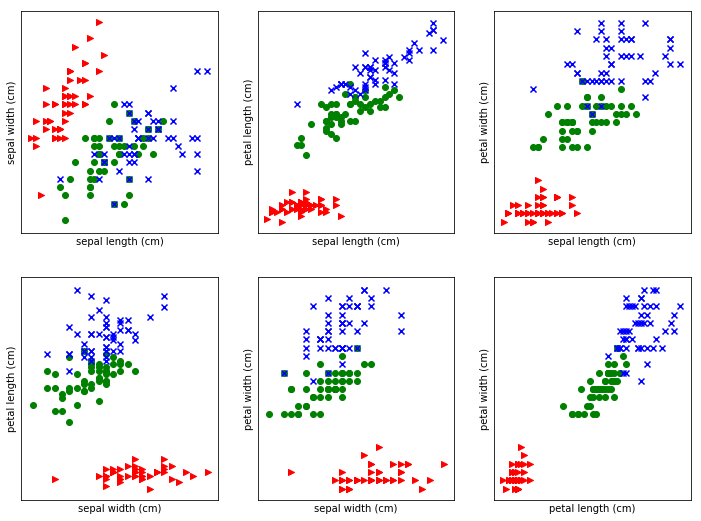

In [16]:
# 4つの特徴量の組み合わせを定義（合計6通り）
# 0: sepal length
# 1: sepal width
# 2: petal length
# 3: petal width
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# 各組み合わせに対して散布図を表示
# グラフのサイズを指定
plt.figure(figsize=(12, 9))

# グラフを特徴量のpairごとに表示
# クラスラベルごとに色を分けてプロット
# 赤: setosa 
# 青: versicolor
# 緑: verginica
for i, (p0, p1) in enumerate(pairs):
    plt.subplot(2, 3, i + 1)
    # クラスラベルごとに色分けしてプロット
    for target, marker, color in zip(list(range(3)), ">ox", "rgb"):
        plt.scatter(X[y == target, p0], X[y == target, p1], marker=marker, c=color)
    plt.xlabel(feature_names[p0])
    plt.ylabel(feature_names[p1])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [29]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)                   # 与えられた行列の各特徴量について､平均と標準偏差を算出
X_std = scaler.fit_transform(X) # Xを標準化した行列を生成

In [33]:
# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 主成分を2つまで取得
X_pca = pca.fit_transform(X_std)

In [34]:
X_pca[:10]

array([[-2.26454173,  0.5057039 , -0.12194335, -0.02307332],
       [-2.0864255 , -0.65540473, -0.22725083, -0.10320824],
       [-2.36795045, -0.31847731,  0.05147962, -0.02782523],
       [-2.30419716, -0.57536771,  0.09886044,  0.06631146],
       [-2.38877749,  0.6747674 ,  0.02142785,  0.03739729],
       [-2.07053681,  1.51854856,  0.03068426, -0.00439877],
       [-2.44571134,  0.07456268,  0.34219764,  0.03809657],
       [-2.23384186,  0.24761393, -0.08257446,  0.02550516],
       [-2.34195768, -1.09514636,  0.1535624 ,  0.02679383],
       [-2.18867576, -0.44862905, -0.24655952,  0.0399073 ]])

In [35]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

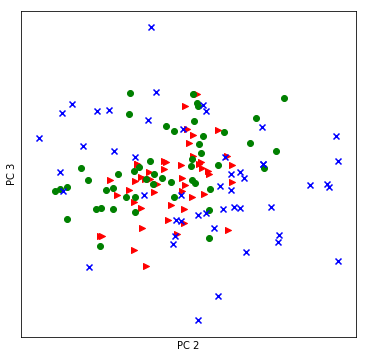

In [43]:
# 特徴抽出による可視化
# PC3とPC4について散布図を表示
plt.figure(figsize=(6, 6))
for target, marker, color in zip(range(3), '>ox', 'rgb'):
    plt.scatter(X_pca[iris.target==target, 2], X_pca[iris.target==target, 3], marker=marker, color=color)
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.xticks([])
plt.yticks([])
plt.show()

In [44]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [46]:
np.sqrt(pca.explained_variance_)

array([1.71182761, 0.96301798, 0.38515221, 0.14403477])

In [52]:
pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis]

array([[ 0.89421016, -0.45081822,  0.99500666,  0.96822861],
       [ 0.35854928,  0.89132754,  0.02031465,  0.06299656],
       [-0.27770122,  0.0932195 ,  0.05426497,  0.24411001],
       [-0.03773647,  0.01787973,  0.11539407, -0.07540887]])

In [53]:
np.sqrt(pca.explained_variance_)[:, np.newaxis]

array([[1.71182761],
       [0.96301798],
       [0.38515221],
       [0.14403477]])

In [54]:
np.sqrt(pca.explained_variance_).reshape(-1, 1)

array([[1.71182761],
       [0.96301798],
       [0.38515221],
       [0.14403477]])

In [57]:
# SVMで分類
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores_1 = cross_val_score(SVC(), X_pca[:, [0,2]], y, cv=5)
scores_1.mean()

0.96

In [58]:
scores_2 = cross_val_score(SVC(), X_pca, y, cv=5)
scores_2.mean()

0.9666666666666666

In [59]:
scores_3 = cross_val_score(SVC(), X_std[:, [0, 2]], y, cv=5)
scores_3.mean()

0.9400000000000001

In [60]:
scores_4 = cross_val_score(SVC(), X_std, y, cv=5)
scores_4.mean()

0.9666666666666666